In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
#loading the time series data
data = pd.read_csv('/kaggle/input/egg-sales-of-a-local-shop-for-30-years/train_egg_sales.csv', sep = ';')

In [76]:
data.head()

,Date,Egg Sales
0,1993-01-01,91
1,1993-01-02,124
2,1993-01-03,112
3,1993-01-04,115
4,1993-01-05,107


In [77]:
data.describe()

,Egg Sales
count,10592.000000
mean,366.326095
std,155.202620
min,0.000000
25%,235.000000
50%,366.000000
75%,499.000000
max,713.000000


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       10592 non-null  object
 1   Egg Sales  10592 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 165.6+ KB


In [79]:
data['Date'] = pd.to_datetime(data['Date'])

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10592 non-null  datetime64[ns]
 1   Egg Sales  10592 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 165.6 KB


In [81]:
data.index = data['Date'] #In a univariant model, Data Time model should be saved as Index 
data.head()

,Date,Egg Sales
Date,,
1993-01-01,1993-01-01,91
1993-01-02,1993-01-02,124
1993-01-03,1993-01-03,112
1993-01-04,1993-01-04,115
1993-01-05,1993-01-05,107


In [82]:
del data['Date']

In [83]:
data

,Egg Sales
Date,
1993-01-01,91
1993-01-02,124
1993-01-03,112
1993-01-04,115
1993-01-05,107
...,...
2021-12-27,681
2021-12-28,664
2021-12-29,613


<Axes: xlabel='Date'>

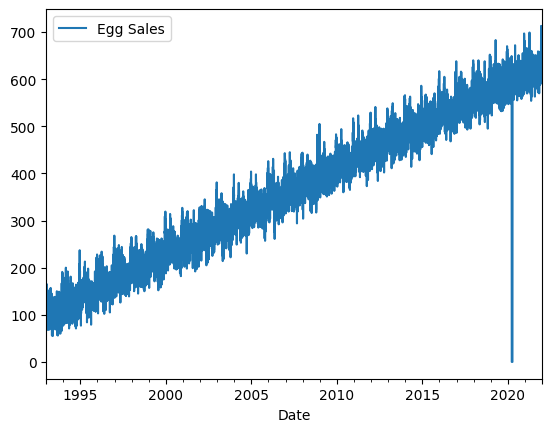

In [84]:
data.plot()

In [85]:
data.isnull().sum()

Egg Sales    0
dtype: int64

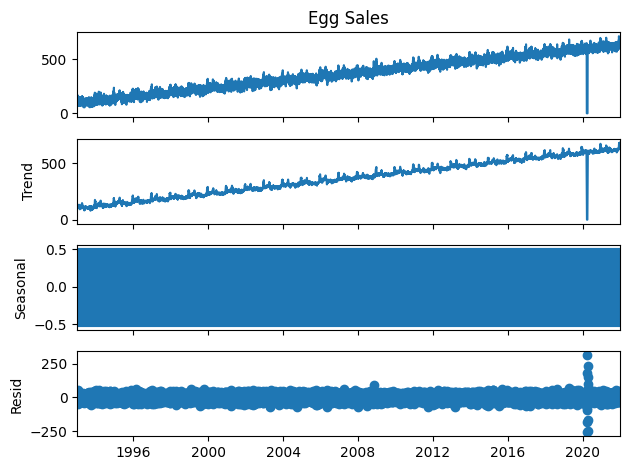

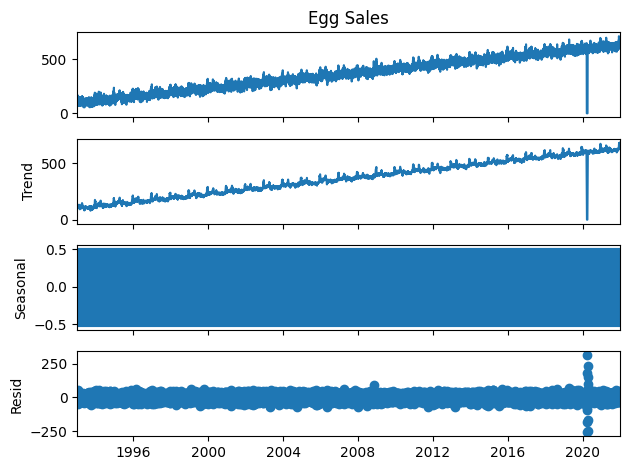

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose #Decompose data into trend, season and error
decompose_result = seasonal_decompose(data['Egg Sales'].dropna())

decompose_result.plot()

---------Clearing Test Data--------------

In [87]:
data1 = pd.read_csv('/kaggle/input/egg-sales-of-a-local-shop-for-30-years/test_egg_sales.csv')

In [88]:
data1 # 358 rows-ok

,Date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
353,2022-12-20
354,2022-12-21
355,2022-12-22
356,2022-12-23


In [89]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    358 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


In [90]:
data1['Date'] = pd.to_datetime(data1['Date'])

In [91]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    358 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.9 KB


---------------------------------------

In [92]:
#rolling mean
mean_log = data.rolling(window=365).mean() #Taking seasonality as yearly 

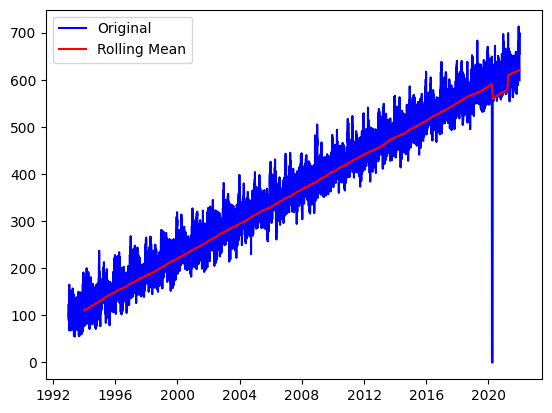

In [93]:
plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')

In [94]:
#checking the stationarity of the series
from statsmodels.tsa.stattools import adfuller # Augmented Dicky-Fuller Test
result = adfuller(data['Egg Sales'])
print(result[1])
print(result)

0.4790307706685805
(-1.6090802361032748, 0.4790307706685805, 36, 10555, {'1%': -3.430969695978145, '5%': -2.8618138703454576, '10%': -2.5669157760426144}, 97936.81305718597)


p > 0.05 , Time Series is not stationary

In [95]:
result = adfuller(data['Egg Sales'].diff().dropna())
print(result[1])

0.0


<Axes: xlabel='Date'>

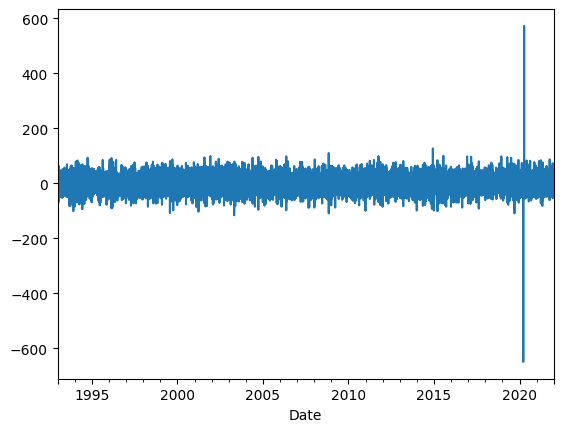

In [96]:
data['Egg Sales'].diff().dropna().plot()

In [97]:
train_data = pd.DataFrame(data['Egg Sales'].diff().dropna())
train_data

,Egg Sales
Date,
1993-01-02,33.0
1993-01-03,-12.0
1993-01-04,3.0
1993-01-05,-8.0
1993-01-06,-3.0
...,...
2021-12-27,-18.0
2021-12-28,-17.0
2021-12-29,-51.0


In [98]:
mean_log = train_data.rolling(window=365).mean()

Text(0.5, 1.0, 'Rolling Mean')

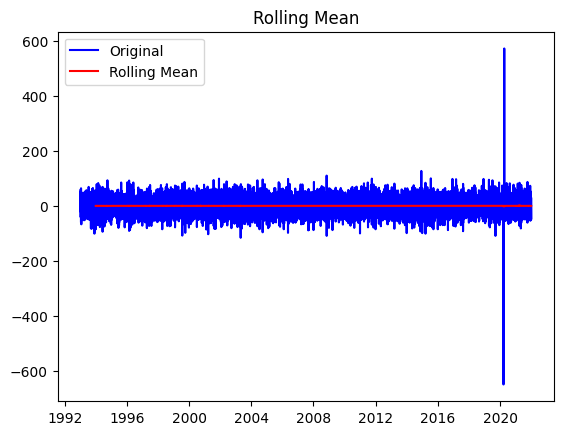

In [99]:
plt.plot(train_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')

In [100]:
#adfuller test for stationarity
result = adfuller(train_data['Egg Sales'])
print(result[1])

0.0


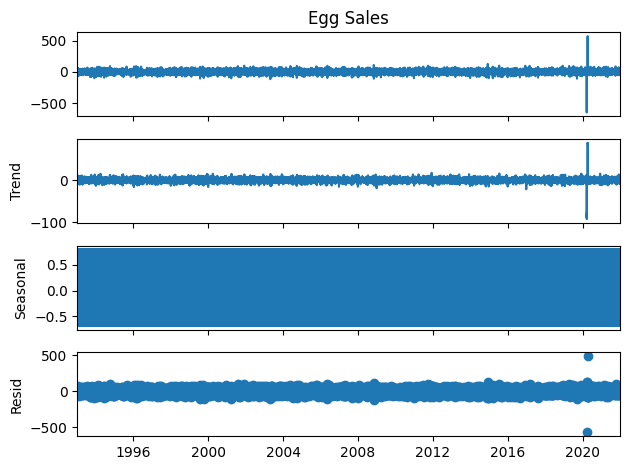

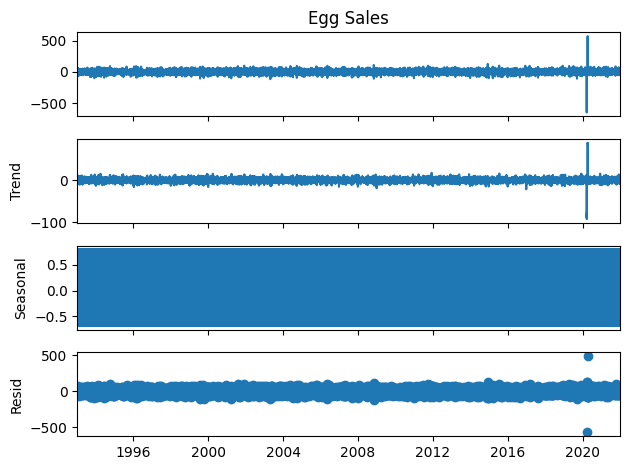

In [101]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(train_data['Egg Sales'].dropna())

decompose_result.plot()

-----------Model Building Starts-----------

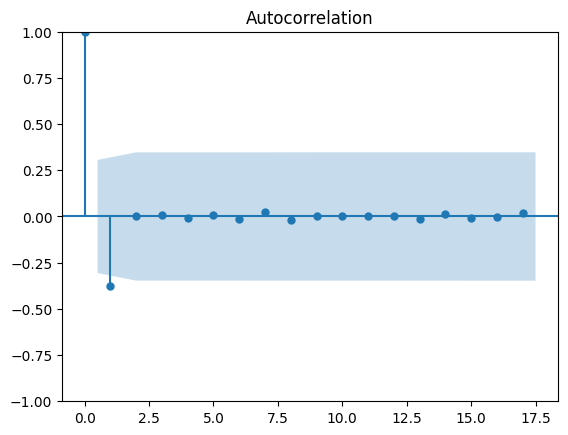

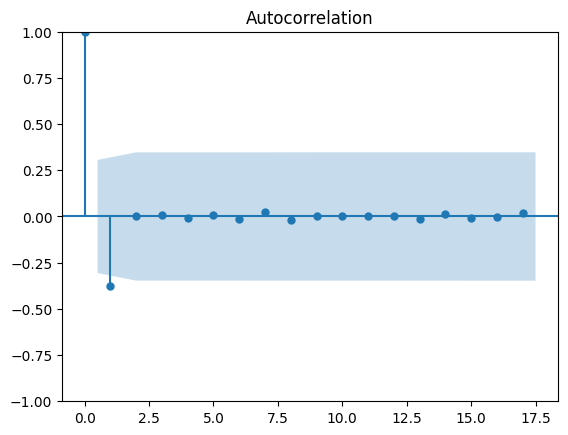

In [102]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(train_data)
plot_acf(acf_plot)

2 line exceding 95% confidence interval, q = 2

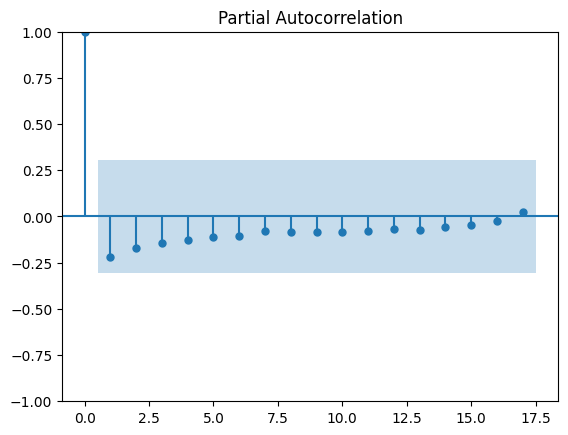

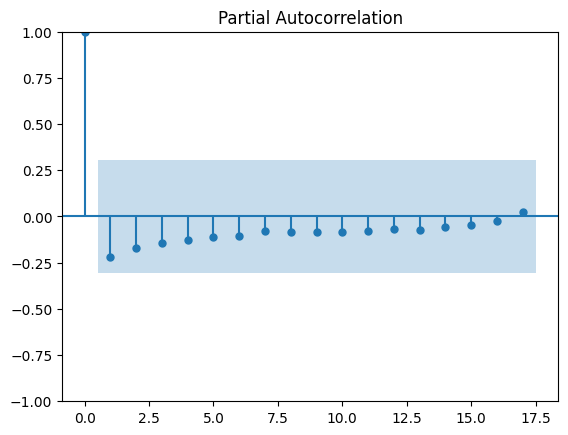

In [103]:
pacf_plot=pacf(train_data)
plot_pacf(pacf_plot)

Only one value excedds the confidence boundary(light blue). Its p value is 1. Its correlationtion value>confidence interval value.

In [104]:
from statsmodels.tsa.arima.model import ARIMA

train = train_data.iloc[:8472]['Egg Sales']   # 80% of data for training
test = train_data.iloc[8473:]['Egg Sales']

model = ARIMA(train, order=(1,0,1)) #p=1,d=0,q=1
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [105]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Egg Sales   No. Observations:                 8472
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -38361.272
Date:                Sun, 29 Oct 2023   AIC                          76730.543
Time:                        23:46:07   BIC                          76758.721
Sample:                    01-02-1993   HQIC                         76740.161
                         - 03-13-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0498      0.046      1.071      0.284      -0.041       0.141
ar.L1         -0.0069      0.013     -0.523      0.601      -0.033       0.019
ma.L1         -0.8082      0.008   -106.497      0.000      -0.823      -0.793
sigma2       501.6809      7.428     67.535      0.000     487.121     516.240
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.69
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.08
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
len(train)+len(test)- 1

10589

In [107]:
train_data['predict'] = model_fit.predict(start= 8473,
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
train_data[['Egg Sales','predict']]

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


,Egg Sales,predict
Date,,
1993-01-02,33.0,NaN
1993-01-03,-12.0,NaN
1993-01-04,3.0,NaN
1993-01-05,-8.0,NaN
1993-01-06,-3.0,NaN
...,...,...
2021-12-27,-18.0,0.049803
2021-12-28,-17.0,0.049803
2021-12-29,-51.0,0.049803


<Axes: xlabel='Date'>

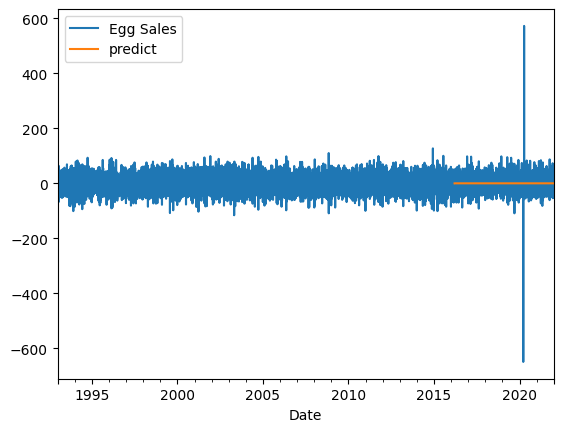

In [108]:
train_data[['Egg Sales','predict']].plot()

In [110]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,1), seasonal_order=(1,1,1,365))
model = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50426D+00    |proj g|=  7.43812D-02


 This problem is unconstrained.


KeyboardInterrupt: 

In [ ]:
train_data['predict'] = model.predict(start= 8473, end=len(train)+len(test)- 1, dynamic=True)
train_data[['Egg Sales','predict']].plot()

In [ ]:
train_data.tail(20)

In [ ]:
#predicting the projections for the test_data.csv
forecast = model.forecast(steps=358)
train_data.plot()
forecast.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
predict_df = new_data[8473:10589]
mean_squared_error(predict_df['Egg Sales'],predict_df['predict'])

In [ ]:
mean_absolute_percentage_error(predict_df['Egg Sales'],predict_df['predict'])